# Handling Missing Data

This notebook contains the Python code for our session on how to handle missing data.  It uses an example data set of blood glucose, as read from a FreeStyle Libre blood glucose monitor.  This is real data!

We start using the usual Python suspects: Pandas, NumPy and matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Next we get a day's worth of insulin data.  Note that we reindexed this to use the minute of the day as the index.

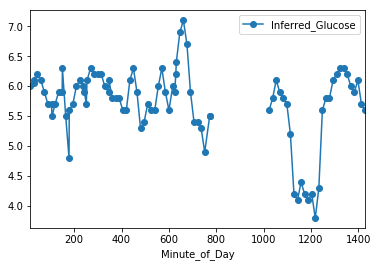

In [37]:
df = pd.read_excel('glucose.xlsx')
df.set_index('Minute_of_Day', inplace=True)
df.plot(style='o-')

Let's find the index entries of the missing data

In [40]:
missing_minutes = list(df[df['Inferred_Glucose'].isnull()].index)
missing_minutes

[787,
 802,
 817,
 832,
 847,
 862,
 877,
 892,
 907,
 922,
 937,
 952,
 967,
 982,
 997,
 1012]

Convenience function for plotting

In [43]:
def method_plot(df, cols):
    fig, ax = plt.subplots()
    if isinstance(cols, str):
        df[cols].plot(style='b--', ax=ax)
    else:
        for c in cols:
            df[c].plot(style='b--', ax=ax)        
    df['Inferred_Glucose'].plot(style='bo', ax=ax)

# Last-Observed Carry Forward (LOCF)

So easy it's build into Pandas' fillna() as method='ffill'

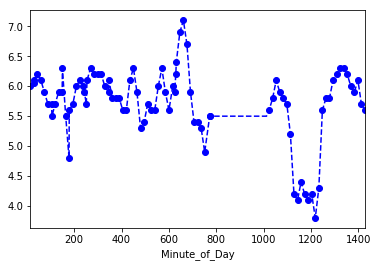

In [44]:
df['Glucose_LOCF'] = df['Inferred_Glucose'].fillna(method='ffill')
method_plot(df, 'Glucose_LOCF')